In [1]:
from pyspark.sql import SparkSession, SQLContext, DataFrame

In [2]:
spark = SparkSession.builder.master("spark://master:7077") \
    .appName('demo') \
    .config("spark.jars", "/tsi/target/scala-2.12/tsi_2.12-0.1.0.jar") \
    .getOrCreate()
sc = spark.sparkContext

In [3]:
from py4j.java_gateway import java_import
java_import(sc._gateway.jvm,"com.microsoft.tsi.*")
connector = sc._gateway.jvm.Connector()

In [4]:
jdf = connector.getDataFrame(spark._jsparkSession)
df = DataFrame(jdf, SQLContext(sc))
df.show()

+-----+---------+------------------+
|ts_id|timestamp|              temp|
+-----+---------+------------------+
|my_id|        0| 42.31817523237933|
|my_id|        1| 42.37323232676122|
|my_id|        2| 42.44419551453773|
|my_id|        3|  42.5980088303805|
|my_id|        4| 42.19531801270925|
|my_id|        5|42.016873381161275|
|my_id|        6|41.554485239058316|
|my_id|        7| 41.91630281828341|
|my_id|        8| 42.35497847487005|
|my_id|        9|42.694280060647365|
|my_id|       10| 42.92108517415602|
|my_id|       11|42.740909376638164|
|my_id|       12| 42.96242648078587|
|my_id|       13|42.912663657939596|
|my_id|       14| 42.43081973407757|
|my_id|       15| 42.18987803957838|
|my_id|       16| 42.59992603211502|
|my_id|       17|42.521245664400695|
|my_id|       18| 42.31417255904684|
|my_id|       19| 42.68792338857269|
+-----+---------+------------------+
only showing top 20 rows



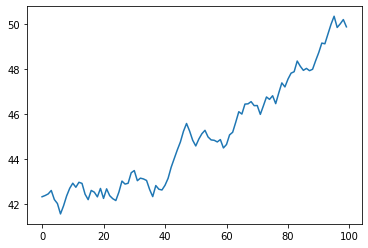

In [6]:
pdf = df.toPandas()
import matplotlib.pyplot as plt
_ = plt.plot(pdf['timestamp'], pdf['temp'])